# Data collection and preprocessing

In [ ]:
!pip install kaggle
import json
!mkdir -p ~/.kaggle

#Enter your kaggle username and api token
!cp '/content/drive/MyDrive/kaggle (1).json' ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [ ]:
!kaggle datasets list -s 'interior_design'

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/datasets/list?group=public&sortby=hottest&size=all&filetype=all&license=all&viewed=unspecified&search=interior_design&page=1


In [ ]:
!kaggle datasets download -d aishahsofea/interior-design -p /content --force

Dataset URL: https://www.kaggle.com/datasets/aishahsofea/interior-design
License(s): copyright-authors
 77% 104M/135M [00:00<00:00, 1.08GB/s]
100% 135M/135M [00:00<00:00, 650MB/s] 


In [ ]:
!unzip interior-design.zip

Archive:  interior-design.zip
  inflating: resized_images/00000000.jpg  
  inflating: resized_images/00000001.jpg  
  inflating: resized_images/00000002.jpg  
  inflating: resized_images/00000003.jpg  
  inflating: resized_images/00000004.jpg  
  inflating: resized_images/00000005.jpg  
  inflating: resized_images/00000006.jpg  
  inflating: resized_images/00000007.jpg  
  inflating: resized_images/00000008.jpg  
  inflating: resized_images/00000009.jpg  
  inflating: resized_images/00000010.jpg  
  inflating: resized_images/00000011.jpg  
  inflating: resized_images/00000012.jpg  
  inflating: resized_images/00000013.jpg  
  inflating: resized_images/00000014.jpg  
  inflating: resized_images/00000015.jpg  
  inflating: resized_images/00000016.jpg  
  inflating: resized_images/00000017.jpg  
  inflating: resized_images/00000018.jpg  
  inflating: resized_images/00000019.jpg  
  inflating: resized_images/00000020.jpg  
  inflating: resized_images/00000021.jpg  
  inflating: resized_ima

In [ ]:
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['doors', 'walls', 'windows', 'furniture']
IMG_SIZE = 224

In [ ]:
'''
import os

input_folder = "/content/resized_images"
output_folder = "/content/resized_images_224"
os.makedirs(output_folder, exist_ok=True)
output_folder
'''

'\nimport os\n\ninput_folder = "/content/resized_images"\noutput_folder = "/content/resized_images_224"\nos.makedirs(output_folder, exist_ok=True)\noutput_folder\n'

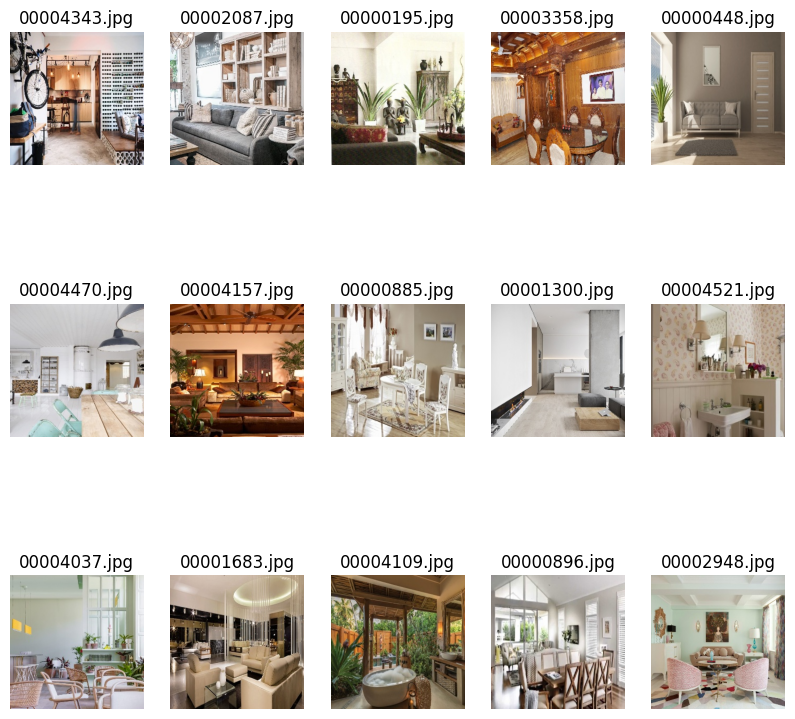

In [ ]:
from PIL import Image
import os

name = '/content/resized_images'
data = os.listdir(name)

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(10,10))
axs = axs.flatten()

for dirname, _, filenames in os.walk(name):
    for i in range(15):
        filepath = os.path.join(name, data[i])
        img = Image.open(filepath)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(data[i])
    plt.show()

In [ ]:
image_properties = []

for filename in data:
    # Load image
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    # Get image size and channel information
    width, height = image.size
    channels = len(image.getbands())  # RGB (3 channels) or grayscale (1 channel)

    image_properties.append({
        'filename': filename,
        'width': width,
        'height': height,
        'channels': channels
    })

# Show some of the properties
for prop in image_properties[:5]:
    print(prop)


{'filename': '00004343.jpg', 'width': 256, 'height': 256, 'channels': 3}
{'filename': '00002087.jpg', 'width': 256, 'height': 256, 'channels': 3}
{'filename': '00000195.jpg', 'width': 256, 'height': 256, 'channels': 3}
{'filename': '00003358.jpg', 'width': 256, 'height': 256, 'channels': 3}
{'filename': '00000448.jpg', 'width': 256, 'height': 256, 'channels': 3}


In [ ]:
intensity_stats = []

for filename in data[:100]:  # Limit to 100 images for performance
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    # Convert to RGB if not already
    image = image.convert('RGB')

    # Convert image to NumPy array
    image_array = np.array(image)

    # Calculate mean pixel intensity for each channel
    mean_r = np.mean(image_array[:, :, 0])
    mean_g = np.mean(image_array[:, :, 1])
    mean_b = np.mean(image_array[:, :, 2])

    intensity_stats.append({
        'filename': filename,
        'mean_r': mean_r,
        'mean_g': mean_g,
        'mean_b': mean_b
    })

# Show intensity stats for first 5 images
for stat in intensity_stats[:5]:
    print(stat)

{'filename': '00004343.jpg', 'mean_r': np.float64(162.4693603515625), 'mean_g': np.float64(147.818359375), 'mean_b': np.float64(140.9853057861328)}
{'filename': '00002087.jpg', 'mean_r': np.float64(160.7425994873047), 'mean_g': np.float64(153.9362335205078), 'mean_b': np.float64(149.45623779296875)}
{'filename': '00000195.jpg', 'mean_r': np.float64(164.49945068359375), 'mean_g': np.float64(157.50042724609375), 'mean_b': np.float64(139.35589599609375)}
{'filename': '00003358.jpg', 'mean_r': np.float64(156.7390594482422), 'mean_g': np.float64(110.87657165527344), 'mean_b': np.float64(79.74288940429688)}
{'filename': '00000448.jpg', 'mean_r': np.float64(138.67825317382812), 'mean_g': np.float64(126.75279235839844), 'mean_b': np.float64(111.26577758789062)}


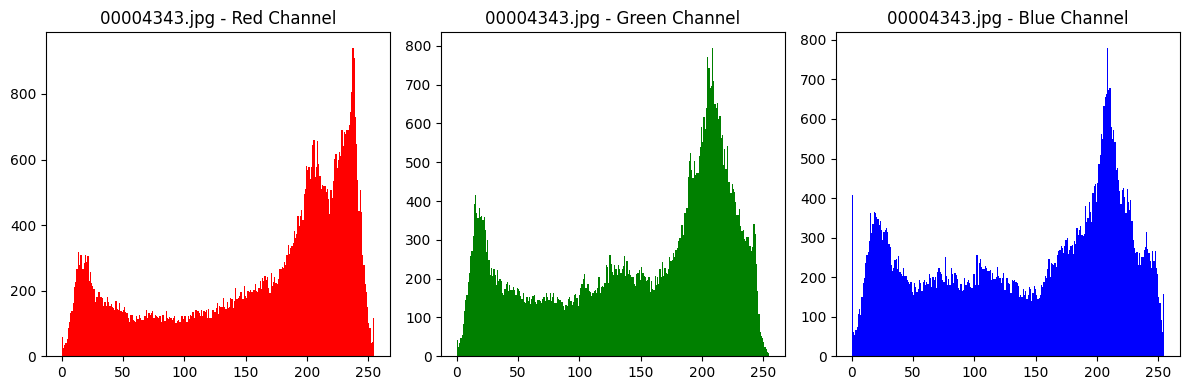

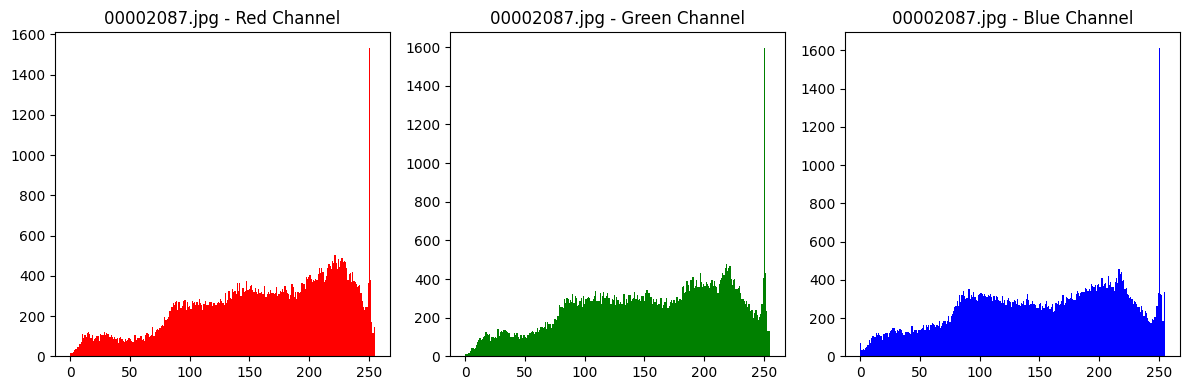

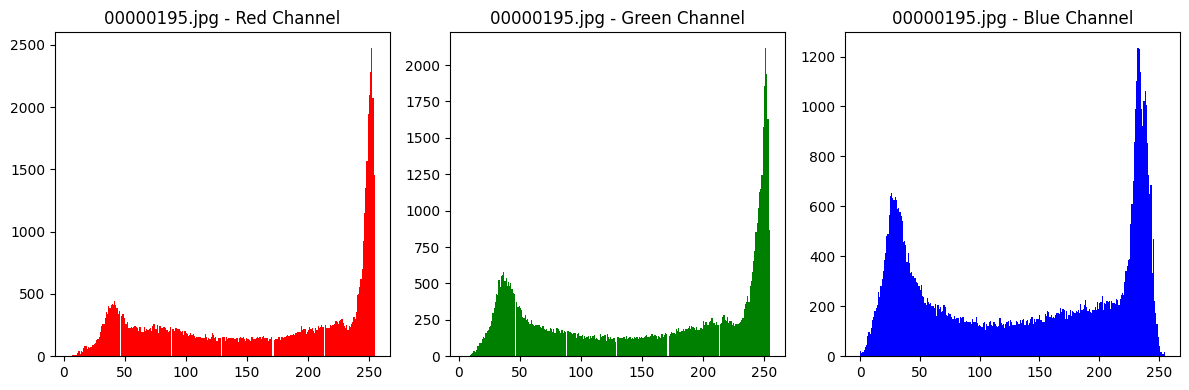

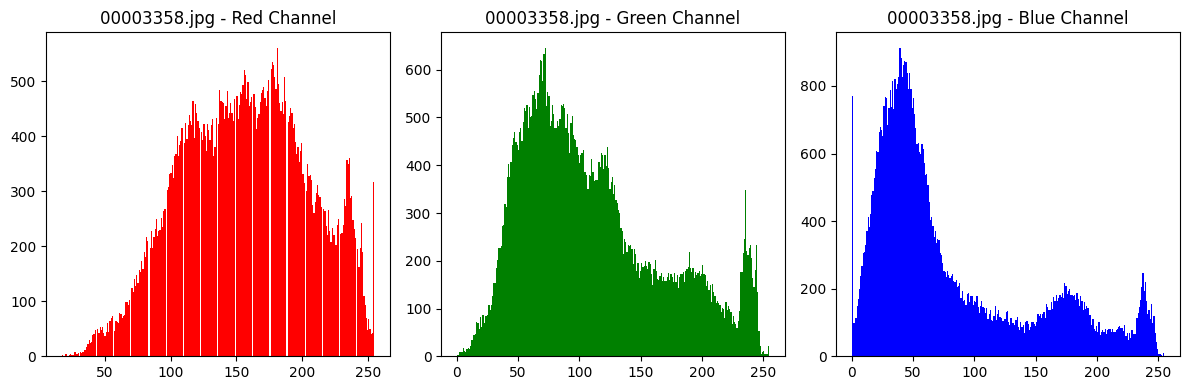

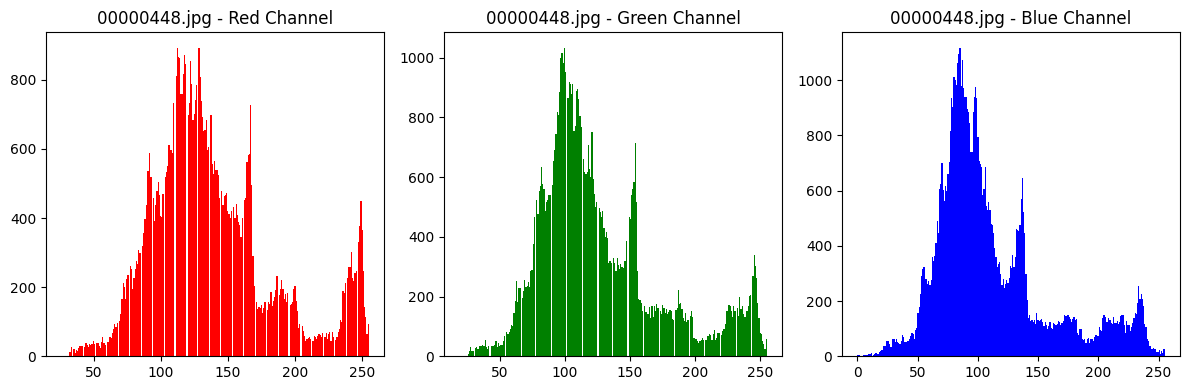

In [ ]:
for filename in data[:5]:  # Limit to first 5 images for visualization
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    image_array = np.array(image.convert('RGB'))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(image_array[:, :, 0].flatten(), bins=256, color='red')
    plt.title(f'{filename} - Red Channel')

    plt.subplot(1, 3, 2)
    plt.hist(image_array[:, :, 1].flatten(), bins=256, color='green')
    plt.title(f'{filename} - Green Channel')

    plt.subplot(1, 3, 3)
    plt.hist(image_array[:, :, 2].flatten(), bins=256, color='blue')
    plt.title(f'{filename} - Blue Channel')

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.cluster import KMeans

dominant_colors = []

for filename in data[:100]:  # Limit to first 100 images for performance
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    image_array = np.array(image.convert('RGB')).reshape(-1, 3)

    # Apply K-means clustering to find 5 dominant colors
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(image_array)

    dominant_colors.append({
        'filename': filename,
        'dominant_colors': kmeans.cluster_centers_.astype(int).tolist()
    })

# Display the dominant colors for the first 5 images
for color in dominant_colors[:5]:
    print(color)


In [ ]:
for filename in data[:5]:  # Limit to first 5 images for demonstration
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    image_array = np.array(image.convert('RGB'))
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

    # Perform Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - {filename}')
    plt.axis('off')
    plt.show()


In [ ]:
import torch
from torchvision import models, transforms

# Load pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

transform = transforms.Compose([transforms.ToTensor()])

# Perform object detection on a subset of images
for filename in data[:5]:  # Limit to first 5 images
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    # Apply transformations
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        prediction = model(image_tensor)

    # Extract bounding boxes and labels
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']

    print(f"Objects detected in {filename}: {labels}")
    print(f"Bounding boxes: {boxes}")


In [ ]:
sharpness_stats = []

for filename in data[:100]:  # Limit to first 100 images for performance
    image_path = os.path.join(name, filename)
    image = Image.open(image_path)

    image_array = np.array(image.convert('RGB'))
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

    # Calculate Laplacian variance (sharpness)
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    sharpness = laplacian.var()

    sharpness_stats.append({
        'filename': filename,
        'sharpness': sharpness
    })

# Display sharpness stats for the first 5 images
for stat in sharpness_stats[:5]:
    print(stat)


In [ ]:
def preprocess_image(image, target_size=(224, 224)):
    # Resize the image
    resized_image = cv2.resize(image, target_size)

    # Normalize pixel values to [0, 1]
    normalized_image = resized_image / 255.0

    return normalized_image

In [ ]:
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        if image is not None:
            # Preprocess the image
            processed_image = preprocess_image(image)

            # Convert to uint8 for saving (scale back from [0, 1] to [0, 255])
            processed_image_uint8 = (processed_image * 255).astype(np.uint8)

            # Save the processed image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, processed_image_uint8)

            print(f"Processed and saved: {filename}")
        else:
            print(f"Could not read: {filename}")

In [ ]:
img = Image.open('/content/resized_images/00000000.jpg')
img

In [ ]:
img = Image.open('/content/resized_images_224/00000000.jpg')
img

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the output folder containing preprocessed images
output_folder = "/content/resized_images_224"  # Replace with your output folder path

# Visualize images
def visualize_images(folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    image_files = image_files[:num_images]  # Limit to specified number of images

    for filename in image_files:
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Convert from BGR (OpenCV format) to RGB for matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Plot the image
            plt.figure()
            plt.imshow(image_rgb)
            plt.title(f"Preprocessed Image - {filename}")
            plt.axis("off")
            plt.show()
        else:
            print(f"Could not read: {filename}")

# Call the function to visualize preprocessed images
visualize_images(output_folder, num_images=5)


In [ ]:
!pip install tensorflow opencv-python matplotlib
!pip install torch torchvision

In [ ]:
pip install tensorflow tensorflow-hub

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained DeepLabV3 model
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()


# Preprocess the image
def preprocess_image(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path)
    original_shape = image.shape[:2]
    resized_image = cv2.resize(image, target_size)
    normalized_image = resized_image / 255.0  # Normalize to [0, 1]
    image_batch = np.expand_dims(normalized_image, axis=0)  # Add batch dimension
    return image_batch, original_shape

# Predict segmentation
def segment_image(image_batch):
    predictions = model.predict(image_batch)
    return np.argmax(predictions[0], axis=-1)

# Post-process segmentation output
def postprocess_segmentation(segmentation_map, original_shape):
    segmentation_map_resized = cv2.resize(segmentation_map, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)
    return segmentation_map_resized

# Visualize the segmentation
def visualize_segmentation(image_path, segmentation_map):
    image = cv2.imread(image_path)
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmentation_map, cmap="jet")
    plt.title("Segmentation Map")
    plt.axis("off")
    plt.show()

# Test the segmentation pipeline
image_path = "/content/resized_images_224/00000000.jpg"  # Replace with your image path
image_batch, original_shape = preprocess_image(image_path)
segmentation_map = segment_image(image_batch)
segmentation_map = postprocess_segmentation(segmentation_map, original_shape)
visualize_segmentation(image_path, segmentation_map)

In [ ]:
# Define a simple CNN model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

CLASSES = ['doors', 'walls', 'windows', 'furniture']

def build_model():
    base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(CLASSES), activation="softmax"),
    ])
    return model


In [ ]:
# Compile and train the model
model = build_model()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(input_folder, validation_data=output_folder, epochs=10)

**Dataset overview:**

In [ ]:
import os
from collections import Counter

# Path to the dataset
dataset_path = "path/to/your/dataset"

# Get category-wise image count
category_counts = {}
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        category_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

print(category_counts)
